In [1]:
import numpy as np
wordsList = np.load('./training_data/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('./training_data/wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [2]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [3]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.93270004,  1.04209995, -0.78514999,  0.91033   ,  0.22711   ,
       -0.62158   , -1.64929998,  0.07686   , -0.58679998,  0.058831  ,
        0.35628   ,  0.68915999, -0.50598001,  0.70472997,  1.26639998,
       -0.40031001, -0.020687  ,  0.80862999, -0.90565997, -0.074054  ,
       -0.87674999, -0.62910002, -0.12684999,  0.11524   , -0.55685002,
       -1.68260002, -0.26291001,  0.22632   ,  0.713     , -1.08280003,
        2.12310004,  0.49869001,  0.066711  , -0.48225999, -0.17896999,
        0.47699001,  0.16384   ,  0.16537   , -0.11506   , -0.15962   ,
       -0.94926   , -0.42833   , -0.59456998,  1.35660005, -0.27506   ,
        0.19918001, -0.36008   ,  0.55667001, -0.70314997,  0.17157   ], dtype=float32)

In [4]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [5]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


In [6]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['./training_data/positiveReviews/' + f for f in listdir('./training_data/positiveReviews/') if isfile(join('./training_data/positiveReviews/', f))]
negativeFiles = ['./training_data/negativeReviews/' + f for f in listdir('./training_data/negativeReviews/') if isfile(join('./training_data/negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


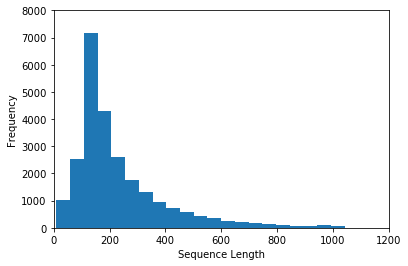

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [8]:
maxSeqLength = 250

In [9]:
fname = positiveFiles[3] #Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit
        

This is easily the most underrated film inn the Brooks cannon. Sure, its flawed. It does not give a realistic view of homelessness (unlike, say, how Citizen Kane gave a realistic view of lounge singers, or Titanic gave a realistic view of Italians YOU IDIOTS). Many of the jokes fall flat. But still, this film is very lovable in a way many comedies are not, and to pull that off in a story about some of the most traditionally reviled members of society is truly impressive. Its not The Fisher King, but its not crap, either. My only complaint is that Brooks should have cast someone else in the lead (I love Mel as a Director and Writer, not so much as a lead).


In [10]:
# 删除标点符号、括号、问号等，只留下字母数字字符
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [11]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        try:
            firstFile[indexCounter] = wordsList.index(word)
        except ValueError:
            firstFile[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

array([    37,     14,   2407, 201534,     96,  37314,    319,   7158,
       201534,   6469,   8828,   1085,     47,   9703,     20,    260,
           36,    455,      7,   7284,   1139,      3,  26494,   2633,
          203,    197,   3941,  12739,    646,      7,   7284,   1139,
            3,  11990,   7792,     46,  12608,    646,      7,   7284,
         1139,      3,   8593,     81,  36381,    109,      3, 201534,
         8735,    807,   2983,     34,    149,     37,    319,     14,
          191,  31906,      6,      7,    179,    109,  15402,     32,
           36,      5,      4,   2933,     12,    138,      6,      7,
          523,     59,     77,      3, 201534,     96,   4246,  30006,
          235,      3,    908,     14,   4702,   4571,     47,     36,
       201534,   6429,    691,     34,     47,     36,  35404,    900,
          192,     91,   4499,     14,     12,   6469,    189,     33,
         1784,   1318,   1726,      6, 201534,    410,     41,    835,
      

In [12]:
# ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
# fileCounter = 0
# for pf in positiveFiles:
#    with open(pf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 

# for nf in negativeFiles:
#    with open(nf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 
# #Pass into embedding function and see if it evaluates. 

# np.save('idsMatrix', ids)

In [13]:
ids = np.load('./training_data/idsMatrix.npy')

In [14]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [15]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 50000

In [16]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [17]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

In [18]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [19]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
#取最终的结果值
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [20]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [21]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [22]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels}) 
    
    if (i % 1000 == 0 and i != 0):
        loss_ = sess.run(loss, {input_data: nextBatch, labels: nextBatchLabels})
        accuracy_ = sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})
        
        print("iteration {}/{}...".format(i+1, iterations),
              "loss {}...".format(loss_),
              "accuracy {}...".format(accuracy_))    
    #Save the network every 10,000 training iterations
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)

iteration 1001/50000... loss 0.692835807800293... accuracy 0.5416666865348816...
iteration 2001/50000... loss 0.7198070883750916... accuracy 0.5...
iteration 3001/50000... loss 0.730301558971405... accuracy 0.3333333432674408...
iteration 4001/50000... loss 0.5424675345420837... accuracy 0.6666666865348816...
iteration 5001/50000... loss 0.5474028587341309... accuracy 0.7916666865348816...
iteration 6001/50000... loss 0.7369804978370667... accuracy 0.5...
iteration 7001/50000... loss 0.6959843039512634... accuracy 0.5416666865348816...
iteration 8001/50000... loss 0.6027401685714722... accuracy 0.6666666865348816...
iteration 9001/50000... loss 0.6570833325386047... accuracy 0.4166666567325592...
iteration 10001/50000... loss 0.6449342370033264... accuracy 0.5833333134651184...
saved to models/pretrained_lstm.ckpt-10000
iteration 11001/50000... loss 0.6498488783836365... accuracy 0.5416666865348816...
iteration 12001/50000... loss 0.5427295565605164... accuracy 0.75...
iteration 13001/

In [23]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models/pretrained_lstm.ckpt-40000


In [24]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 70.8333313465
Accuracy for this batch: 91.6666686535
Accuracy for this batch: 66.6666686535
Accuracy for this batch: 91.6666686535
Accuracy for this batch: 75.0
Accuracy for this batch: 95.8333313465
Accuracy for this batch: 75.0
Accuracy for this batch: 79.1666686535
Accuracy for this batch: 91.6666686535
Accuracy for this batch: 75.0
